<h2> Desafío Data México </h2>
<h4> <p> Segunda Edición - Datos con perspectiva de género </p> </h4> 

Importación de librerías:

In [82]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Carga de información:

- Utilizamos la **DataMexico API Explorer** para obtener los datos actualizados:

In [3]:
data=requests.get('https://api.datamexico.org/tesseract/data.jsonrecords?cube=gobmx_covid&drilldowns=Death+Date%2CCovid+Result%2CHealth+Institution+Attended%2CPneumonia+Diagnose%2CSpeaks+Indigenous+Language%2CCOPD+Diagnose%2CAsthma+Diagnose%2CInmunosupresion+Diagnose%2CHypertension+Diagnose%2CCardiovascular+Diagnose%2CObesity+Diagnose%2CChronic+Kidney+Failure+Diagnose%2CDiabetes+Diagnose%2CSmoking+Diagnose%2CContact+with+Another+Covid+Case%2CState+Patient+Attended%2CState+Patient+Origin&measures=Cases&parents=false&sparse=false')
data_api=pd.DataFrame(data.json()["data"])

In [12]:
data_api.columnsns

Index(['Death Date ID', 'Death Date', 'Covid Result ID', 'Covid Result',
       'Health Institution Attended ID', 'Health Institution Attended',
       'Pneumonia Diagnose ID', 'Pneumonia Diagnose',
       'Speaks Indigenous Language ID', 'Speaks Indigenous Language',
       'COPD Diagnose ID', 'COPD Diagnose', 'Asthma Diagnose ID',
       'Asthma Diagnose', 'Inmunosupresion Diagnose ID',
       'Inmunosupresion Diagnose', 'Hypertension Diagnose ID',
       'Hypertension Diagnose', 'Cardiovascular Diagnose ID',
       'Cardiovascular Diagnose', 'Obesity Diagnose ID', 'Obesity Diagnose',
       'Chronic Kidney Failure Diagnose ID', 'Chronic Kidney Failure Diagnose',
       'Diabetes Diagnose ID', 'Diabetes Diagnose', 'Smoking Diagnose ID',
       'Smoking Diagnose', 'Contact with Another Covid Case ID',
       'Contact with Another Covid Case', 'State Patient Attended ID',
       'State Patient Attended', 'State Patient Origin ID',
       'State Patient Origin', 'Cases'],
      dtype='o

In [4]:
# basecovid=pd.read_csv('BaseCovid2021.csv')

- Datos históricos de **Mortalidad 2012-2019** del INEGI:

In [5]:
hist_muertes=pd.read_csv(f'defunciones_generales_{2012}.csv')
hist_muertes['date']='2012'

for i in range(2013,2020):
    aux=pd.read_csv(f'defunciones_generales_{i}.csv')
    aux['date']=i
    hist_muertes=pd.concat([hist_muertes,aux])

In [6]:
hist_muertes.to_csv("Bases_INEGI.csv")

In [7]:
# hist_muertes[600000:600050]
hist_muertes.tail(2)

,ent_regis,mun_regis,causa_def,lista_mex,sexo,edad,mes_regis,ocupacion,escolarida,edo_civil,ocurr_trab,asist_medi,nacionalid,derechohab,embarazo,rel_emba,area_ur,date
747782,32,37,X954,55,1,4998,12,99,99,9,8,9,9,99,8,8,9,2019
747783,32,56,J09X,33C,2,4061,2,11,4,5,8,1,1,7,8,8,1,2019


- Resultados de **Censo Nacional de Población 2020** realizado por el INEGI:

In [8]:
# inegi2020=pd.read_csv('inegi2020_con_clavegeo.csv')

- Creamos el catálogo de enfermedades según la **CIE - 10**

Concatenamos todas las incidencias:

In [21]:
cat_enfermedad=pd.read_csv(f'decatcausa{2012}.csv', encoding='latin-1')

for i in range(2013,2020):
    aux=pd.read_csv(f'decatcausa{i}.csv',encoding='latin-1')
    cat_enfermedad=pd.concat([cat_enfermedad,aux])
    
cat_enfermedad=cat_enfermedad.reset_index()

Creamos los diccionarios para encontrar las claves únicas:

In [22]:
claves_duplicadas={}

for i in range(len(cat_enfermedad)):
    claves_duplicadas[cat_enfermedad['CVE'][i]]=str(cat_enfermedad['DESCRIP'][i])
    
dict_no_duplicados = {} 
for key, value in claves_duplicadas.items(): 
    if not value in dict_no_duplicados.values(): 
        dict_no_duplicados[key] = value 

Creamos y exportamos un DF con todas los dictámenes históricos:

In [23]:
claves=pd.DataFrame(list(dict_no_duplicados.keys()),columns=['Clave'])  

desc=[]
for i in claves['Clave']:
    desc.append(dict_no_duplicados[str(i)])
    
descr=pd.DataFrame(pd.Series(desc),columns=['Dictamen'])

catalogo_completo=pd.concat([claves,descr],axis=1)

catalogo_completo.to_csv('Catalogo_CIE_10.csv')
catalogo_completo.head(5)

,Clave,Dictamen
0,A000,"Cólera debido a Vibrio cholerae 01, biotipo ch..."
1,A001,"Cólera debido a Vibrio cholerae 01, biotipo el..."
2,A009,"Cólera, no especificado"
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea A


### Exploración de Información

In [9]:
def Exp_Data(data):
    
    print(f'Shape: {data.shape}\n')

    nulos=data.isnull().sum()
    print(f'Datos nulos: \n {nulos[nulos>0]}\n')
    
    info=data.info()
    
    return data.head(3)

API Data México

In [10]:
Exp_Data(data_api)

Shape: (213916, 35)

Datos nulos: 
 Series([], dtype: int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213916 entries, 0 to 213915
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Death Date ID                       213916 non-null  int64 
 1   Death Date                          213916 non-null  object
 2   Covid Result ID                     213916 non-null  int64 
 3   Covid Result                        213916 non-null  object
 4   Health Institution Attended ID      213916 non-null  int64 
 5   Health Institution Attended         213916 non-null  object
 6   Pneumonia Diagnose ID               213916 non-null  int64 
 7   Pneumonia Diagnose                  213916 non-null  object
 8   Speaks Indigenous Language ID       213916 non-null  int64 
 9   Speaks Indigenous Language          213916 non-null  object
 10  COPD Diagnose ID                    213916

,Death Date ID,Death Date,Covid Result ID,Covid Result,Health Institution Attended ID,Health Institution Attended,Pneumonia Diagnose ID,Pneumonia Diagnose,Speaks Indigenous Language ID,Speaks Indigenous Language,COPD Diagnose ID,COPD Diagnose,Asthma Diagnose ID,Asthma Diagnose,Inmunosupresion Diagnose ID,Inmunosupresion Diagnose,Hypertension Diagnose ID,Hypertension Diagnose,Cardiovascular Diagnose ID,Cardiovascular Diagnose,Obesity Diagnose ID,Obesity Diagnose,Chronic Kidney Failure Diagnose ID,Chronic Kidney Failure Diagnose,Diabetes Diagnose ID,Diabetes Diagnose,Smoking Diagnose ID,Smoking Diagnose,Contact with Another Covid Case ID,Contact with Another Covid Case,State Patient Attended ID,State Patient Attended,State Patient Origin ID,State Patient Origin,Cases
0,20200102,2020-01-02,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,2,No,2,No,1,Yes,2,No,2,No,2,No,2,No,2,No,2,No,99,Not Specified,9,Ciudad de México,9,Ciudad de México,1
1,20200103,2020-01-03,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,2,No,1,Yes,2,No,2,No,2,No,2,No,2,No,2,No,2,No,99,Not Specified,2,Baja California,2,Baja California,1
2,20200103,2020-01-03,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,2,No,2,No,2,No,2,No,2,No,1,Yes,2,No,1,Yes,2,No,99,Not Specified,5,Coahuila de Zaragoza,5,Coahuila de Zaragoza,1


Hay valores nulos en **State** los podemos llenar con el ID que les corresponda, para eso creamos una dupla con las claves únicas:

In [13]:
# cve_state=[[clave,data_api[data_api['State ID']==clave]['State'].unique()[0]] for clave in sorted(data_api['State ID'].unique())]
# claves=[clave[0] for clave in cve_state]
# edos=[edo[1] for edo in cve_state]

Y tranformamos la data en DF:

In [ ]:
# df_cve_state=pd.DataFrame({'State ID':claves, 'State': edos}).set_index('State ID')
# df_cve_state.head(2)

Hacemos *merge* para rellenar los valores y eliminamos la columna dulicada:

In [ ]:
# inner_join = pd.merge(data_api,df_cve_state,on ='State ID',how ='inner')
# data_api=inner_join.drop('State_x',axis=1)
# print(f'Valores nulos: {data_api.isna().sum().sum()}')

**INEGI**

In [ ]:
Exp_Data(inegi2020)

In [ ]:
data_api.head(3)

### Mortalidad mujeres

In [ ]:
hist_muertes=pd.read_csv('Bases_INEGI.csv',engine='python')

In [30]:
mortalidad_mujeres = hist_muertes.loc[hist_muertes['sexo'] == 2]

In [31]:
mortalidad_mujeres.columns

Index(['Unnamed: 0', 'ent_regis', 'mun_regis', 'ent_resid', 'mun_resid',
       'tloc_resid', 'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr',
       'loc_ocurr', 'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr',
       'mes_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis',
       'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida',
       'edo_civil', 'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia',
       'asist_medi', 'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab',
       'embarazo', 'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo',
       'lista1', 'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax', 'date'],
      dtype='object')


Removemos outliers para el año de ocurrencia

In [32]:
outliers = mortalidad_mujeres.loc[mortalidad_mujeres['anio_ocur'] == 9999]
lista = outliers.index.to_list()

In [33]:
mortalidad_mujeres = mortalidad_mujeres.drop([65254,75238,85213,87781,191879, 209226, 349174, 391293, 470337, 481586, 578035, 579352, 580016,580972, 581455, 601474])

In [37]:
frecuencias= mortalidad_mujeres['causa_def'].value_counts()
# frecuencias.head(20)

In [39]:
mortalidad_mujeres.head(3)

,Unnamed: 0,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,lista_mex,sexo,edad,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,ocupacion,escolarida,edo_civil,presunto,ocurr_trab,lugar_ocur,necropsia,asist_medi,sitio_ocur,cond_cert,nacionalid,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,vio_fami,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,date
2,2,1,1,1.0,1.0,1.0,7777.0,1.0,1.0,1.0,7777.0,M729,37H,2,4081,28.0,2.0,2012.0,2.0,3,2012.0,99.0,99.0,1931.0,12,8,3,8.0,8,88.0,2.0,1,11.0,1.0,1,1,8,8,19.0,55.0,13.0,11.0,83.0,37,8.0,2,21.0,8.0,28.0,2.0,2012.0,NaN,9.0,1.0,88.0,88.0,888.0,8888.0,0.0,999.0,2012
7,7,1,1,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,C349,10B,2,4048,19.0,8.0,2011.0,13.0,3,2012.0,25.0,4.0,1963.0,81,6,5,8.0,8,88.0,2.0,1,11.0,1.0,1,2,5,2,17.0,50.0,2.0,3.0,34.0,10,8.0,1,14.0,2.0,19.0,8.0,2011.0,NaN,9.0,1.0,88.0,88.0,888.0,8888.0,0.0,999.0,2012
8,8,1,1,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,I219,28A,2,4070,15.0,3.0,2012.0,20.0,3,2012.0,15.0,3.0,1942.0,2,4,1,8.0,8,88.0,2.0,1,8.0,1.0,1,7,8,8,9.0,15.0,9.0,4.0,67.0,28,8.0,1,19.0,8.0,15.0,3.0,2012.0,NaN,9.0,2.0,88.0,88.0,888.0,8888.0,0.0,999.0,2012


In [ ]:
#I219 Infarto agudo del miocardio
#E119 Diabetes mellitus no insulinodependiente, sin complicaciones
#E112 Diabetes mellitus no insulinodependiente, con complicaciones renales
#E149 Diabetes mellitus no especificada
#J189 Neumonia no especificada 
#C509 Tumor maligno de mama 
#J449 Enfermedad pulmonar obstructiva
#K746 Cirrosis del higado
#E142 Diabetes mellitus no especificada, con complicaciones renales
#C539 Tumor maligno del cuello del utero
#I10X Hipertension esencial (primaria)
#I64X Accidente vascular encefálico 
#I110 Enfermedad cardiaca hipertensiva con insuficiencia cardiaca
#J440 Enfermedad pulmonar obstructiva crónica con infección aguda de las vías respiratorias
#E117 Diabetes mellitus no insulinodependiente con complicaciones múltiples
#N189 Enfermedad renal crónica 
#I120 Enfermedad renal hipertensiva
#I619 Enfermedad renal hipertensiva con insuficiencia renal
#C169 Tumor maligno del estómago
#N390 Infección en vías urinarias 

### Regiones Nielsen 

In [24]:
# Área I: Pacífico - Baja California Norte, Baja California Sur, Sonora, Sinaloa, Nayarit (5) - [2, 3, 26, 25, 18]
# Área II: Norte - Chihuahua, Coahuila, Durango, Nuevo León, San Luis Potosí, Tamaulipas, Zacatecas (7) - [8, 5, 10, 19, 24, 28, 32]
# Área III: Bajío-  Aguascalientes, Jalisco, Guanajuato, Colima, Michoacan (5) - [1, 14, 11, 6, 16]
# Área IV: Centro- Hidalgo, Querétaro, Morelos, Edo. México, Tlaxcala, Puebla, Guerrero (7) - [13, 22, 17, 15, 29, 21, 12]
# Área V: Valle de México - Cdmx (1) - [9]
# Área VI: Sureste - Chiapas, Campeche, Yucatan, Quintana Roo, Veracruz, Oaxaca, Tabasco (7) - [7, 4, 31, 23, 30, 20, 27]

In [40]:
pacifico = [2, 3, 26, 25, 18]
norte = [8, 5, 10, 19, 24, 28, 32]
bajio = [1, 14, 11, 6, 16]
centro = [13, 22, 17, 15, 29, 21, 12]
vallem = [9]
sureste = [7, 4, 31, 23, 30, 20, 27]

In [42]:
mortalidad_mujeres['region']=np.where(mortalidad_mujeres['ent_regis'].isin(pacifico),'pacifico',
                                      np.where(mortalidad_mujeres['ent_regis'].isin(norte),'norte',
                                               np.where(mortalidad_mujeres['ent_regis'].isin(bajio),'bajio',
                                                np.where(mortalidad_mujeres['ent_regis'].isin(centro),'centro',
                                                         np.where(mortalidad_mujeres['ent_regis'].isin(vallem),'vallem',
                                                             np.where(mortalidad_mujeres['ent_regis'].isin(sureste),'sureste','revisar' 
                                                                  )
                                                             )
                                                       )
                                                  )
                                              )
                                        )

In [44]:
mortalidad_mujeres[['ent_regis','region']].head(3)

,ent_regis,region
2,1,bajio
7,1,bajio
8,1,bajio


In [52]:
mortalidad_mujeres['gpo_enfermedad']=np.where(mortalidad_mujeres['causa_def'].isin(EPOC),'EPOC',
                                               np.where(mortalidad_mujeres['causa_def'].isin(asma),'asma',
                                                 np.where(mortalidad_mujeres['causa_def'].isin(cardiovascular),'cardiovascular',
                                                   np.where(mortalidad_mujeres['causa_def'].isin(hipertension),'hipertension',
                                                     np.where(mortalidad_mujeres['causa_def'].isin(diabetes),'diabetes',
                                                       np.where(mortalidad_mujeres['causa_def'].isin(neumonia),'neumonia',
                                                         np.where(mortalidad_mujeres['causa_def'].isin(insuf_renal),'insuf_renal',
                                                           np.where(mortalidad_mujeres['causa_def'].isin(obesidad),'obesidad',
                                                              np.where(mortalidad_mujeres['causa_def'].isin(inmunosup),'inmunosupresores','otros'
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )

In [53]:
mortalidad_mujeres[['gpo_enfermedad','causa_def']].head(3)

,gpo_enfermedad,causa_def
2,otros,M729
7,inmunosupresores,C349
8,otros,I219


In [25]:
# pacifico = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([2, 3, 26, 25, 18])]
# norte = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([8, 5, 10, 19, 24, 28, 32])]
# bajio = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([1, 14, 11, 6, 16])]
# centro = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([13, 22, 17, 15, 29, 21, 12])]
# vallem = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([9])]
# sureste = mortalidad_mujeres[mortalidad_mujeres['ent_regis'].isin([7, 4, 31, 23, 30, 20, 27])]

In [80]:
# df = pacifico
# # fig = px.line(df, x='anio_ocur', y='causa_def', color='causa_def')
# fig = px.line(df, x='date', y='causa_def', color='causa_def')
# fig.show()

In [ ]:
defuncionesi = pacifico['causa_def'].value_counts() # No hay diferencias significativas
#Infarto agudo del miocardio, Diabetes no insulinodependiente, Tumor maligno de mama, Neumonia no especificada, Diabetes no especificada 

In [ ]:
defuncionesii = norte['causa_def'].value_counts() # No hay diferencias significativas
# Infarto agudo del miocardio, Diabetes no insulinodependiente, Diabetes no insulinodependiente, Neumonia no especificada, Tumor maligno de mama  

In [ ]:
defuncionesiii = bajio['causa_def'].value_counts() # No hay diferencias significativas
# Infarto agudo del miocardio, Diabetes no insulinodependiente, Diabetes no insulinodependiente, Neumonia, Tumor maligno de mama

In [ ]:
defuncionesiv = centro['causa_def'].value_counts() #Registra más probabilidad de morir de diabetes
# Infarto agudo del miocardio, Diabetes no insulinodependiente, Diabetes no insulinodependiente, Enfermedad pulmonar obstructiva, Diabetes mellitus no insulinodependiente 

In [ ]:
defuncionesv= vallem['causa_def'].value_counts() #No hay diferencias significativas
#Infarto agudo del miocardio, Diabetes no insulinodependiente, Neumonia no especificada, Diabetes no insulinodependiente, Tumor maligno de mama  

In [ ]:
defuncionesvi = sureste['causa_def'].value_counts() #Más probabilidad de morir de diabetes, único caso de cirrosis
#Infarto agudo, Diabetes, Diabetes, Cirrosis del higado, Diabetes

### Clasificación de las Enfermedades según la CIE-10 

In [45]:
EPOC=["J44"+str(i) for i in range(0,10)]

asma=["J450","J451","J458","J459","J46X"]
# cardiovascular=["I0"+str(i)+str(j) for i in range(5,10) for j in range(0,10)]+\ # Cardiopatía reumática
# ["I10X"]+["I1"+str(i)+str(j) for i in range(0,6) for j in range(0,10)]+\ # Hipertensión Arterial
# ["I42X"]+["I42"+str(i)+str(j)  for i in range(0,10) for j in range(0,10)]+\ # Miocardiopatías
# ["I50X"]+["I50"+str(i)+str(j)  for i in range(0,10) for j in range(0,10)]+\ # Insuficiencia cardiaca
# ["I60X"]+["I"+str(i)+str(j)  for i in range(60,70) for j in range(0,10)] +\ # Enfermedad cerebrovascular
# ["I70X","I80X"]+["I"+str(i)+str(j)  for i in range(70,90) for j in range(0,10)] +\ # Enfermedad vascular perifería
# ["Q20X"]+["Q2"+str(i)+str(j)  for i in range(0,9) for j in range(0,10)] # Cardiopatía congénita

cardiovascular=["I0"+str(i)+str(j) for i in range(5,10) for j in range(0,10)]+ \
["I10X"]+["I1"+str(i)+str(j) for i in range(0,6) for j in range(0,10)]+ \
["I42X"]+["I42"+str(i) for i in range(0,10)]+\
["I50X"]+["I50"+str(i)  for i in range(0,10)]+\
["I60X"]+["I"+str(i)+str(j)  for i in range(60,70) for j in range(0,10)] +\
["I70X","I80X"]+["I"+str(i)+str(j)  for i in range(70,90) for j in range(0,10)] +\
["Q20X"]+["Q2"+str(i)+str(j)  for i in range(0,9) for j in range(0,10)] 

hipertension=['G932','I270','I272','K766','O10X','O11X','O13X','O14X','O16X','P292']+ \
["O"+str(i)+str(j) for i in range(10,15) for j in range(0,10)]+\
["O16"+str(i) for i in range(0,10)]

diabetes=["E1"+str(i)+str(j) for i in range(0,5) for j in range(0,10)]+['E232','N251','P702']+["O24"+str(i) for i in range(0,10)]

neumonia=["J1"+str(i)+str(j) for i in range(0,9) for j in range(0,10)]+['J851']+["P23"+str(i) for i in range(0,10)]

insuf_renal=["N1"+str(i)+str(j) for i in range(7,10) for j in range(0,10)]+["I17X","I18X","I19X"]+['P960']

obesidad=["E66"+str(i) for i in range(0,10)]

'''VIH [B20-B24] + Cáncer [C0-C97] + Rechazo de trasplantes [T86] ''' 
inmunosup=["B"+str(i)+str(j) for i in range(20,25) for j in range(0,10)]+['B24X','O987','R75X']+\
["C00"+str(i) for i in range(0,10)]+["C0"+str(i) for i in range(10,100)]+["C"+str(i)+str(j) for i in range(10,97) for j in range(0,10)]+\
["T86"+str(i) for i in range(0,10)]

In [ ]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url
selection = alt.selection_multi(fields=['series'], bind='legend')

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T', axis=alt.Axis(domain=False, format='%Y', tickSize=0)),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [36]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [54]:
mortalidad_mujeres.columns

Index(['Unnamed: 0', 'ent_regis', 'mun_regis', 'ent_resid', 'mun_resid',
       'tloc_resid', 'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr',
       'loc_ocurr', 'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr',
       'mes_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis',
       'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida',
       'edo_civil', 'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia',
       'asist_medi', 'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab',
       'embarazo', 'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo',
       'lista1', 'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax', 'date', 'region', 'gpo_enfermedad'],
      dtype='object')

In [84]:
hist_muertes.columns

Index(['Unnamed: 0', 'ent_regis', 'mun_regis', 'ent_resid', 'mun_resid',
       'tloc_resid', 'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr',
       'loc_ocurr', 'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr',
       'mes_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis',
       'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida',
       'edo_civil', 'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia',
       'asist_medi', 'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab',
       'embarazo', 'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo',
       'lista1', 'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax', 'date'],
      dtype='object')

In [ ]:
hist_muertes

In [94]:
hist_muertes["anio_regis"].unique()

array([2012.,   nan])

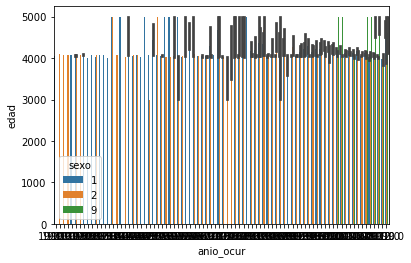

In [91]:
ax = sns.barplot(x="anio_ocur", y="edad", hue="sexo", data=hist_muertes)

In [60]:
mortalidad_mujeres_1=mortalidad_mujeres[mortalidad_mujeres['gpo_enfermedad']!='otros']

In [65]:
fig = px.sunburst(mortalidad_mujeres_1, path=['date','gpo_enfermedad'],color='date',color_continuous_scale='Spectral')
# fig = px.sunburst(mortalidad_mujeres_1, path=['date','gpo_enfermedad'],color='date',color_continuous_scale='RdBu')
# fig = px.sunburst(mortalidad_mujeres_1, path=['date','gpo_enfermedad'],color='date')
fig.show()

In [73]:
fig = px.sunburst(mortalidad_mujeres_1, path=['date','gpo_enfermedad'],color='date',color_continuous_scale='sunset')
fig.show()

In [ ]:
fig = px.bar(mortalidad_mujeres_1, x="region", y="causa_def", color="causa_def")
fig.show()

# fig = px.sunburst(mortalidad_mujeres_1, path=['gpo_enfermedad','causa_def'],color='date',color_continuous_scale='sunset')
# fig.show()

In [90]:
# sns.(data=mortalidad_mujeres_1,x="region", y="causa_def")

In [77]:
# fig = px.sunburst(mortalidad_mujeres_1, path=['date','gpo_enfermedad'],color='date',color_continuous_scale='sunsetdark')
# fig.show()